## Machine Learning Final Project
#### By Ohm Patel (odp2008)
#### Objective: To assign a valence score or positivity score (From 0 to 1, 1 being the most positive and 0 being the most negative) to a song based on it's lyrics.
##### Performance Metrics: R2 Score, Mean Squared Error

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from wordcloud import WordCloud

### Data extraction and cleaning

In [15]:
df = pd.read_csv('/content/drive/MyDrive/ml_project/song_data.csv')
data = df.drop_duplicates()
data = data.sample(frac=0.5, random_state=42)

In [16]:
#Finding the count of rows that have NaN or missing values
missing_values = data.isna()
rows_with_missing_values = missing_values.sum(axis=1) > 0
count_rows_with_missing_values = rows_with_missing_values.sum()
print("Count of Rows with One or More Missing Values:", count_rows_with_missing_values)

Count of Rows with One or More Missing Values: 0


#### Data insights:
#### 4 features: Artist Name, Song Name, Song Lyrics, Positivity Score (from 0 to 1 - valence score as provided by spotify)
#### Since the dataset is large, we have taken a 50% sample to work with. It cointains 15836 rows of data

In [17]:
data

,artist,seq,song,label
12377,Holly Golightly,Now thinkin'\nMakes your head spin\nThe nights...,No Hope Bar,0.466572
20865,Aretha Franklin,Sometimes you love me like a good man oughta\r...,See Saw,0.816580
1328,Let Go,Don't tell me it's all in my head\r\nYou say i...,Bombs Away,0.557803
18496,Iron Savior,[Hey you shadow bastards! We'll blow your asse...,Predators,0.590113
23653,Santana,Just because in a moment of madness\r\nI took ...,One Chain,0.743740
...,...,...,...,...
17592,Michelle Wright,(Steve Bogard/Colin Linden)\r\n(Track 8 - Time...,Guitar Talk,0.558986
23153,Angel Corpus Christi,"Hey Jude, don't make it bad\r\nTake a sad song...",Hey Jude,0.334294
3692,The Outfield,I don't tell the truth \r\nI bet that's not a ...,Bangin' on My Heart,0.614920
6866,Tina Turner,I met a gin soaked bar-room man in Memphis\r\n...,Honky Tonk Women,0.711970


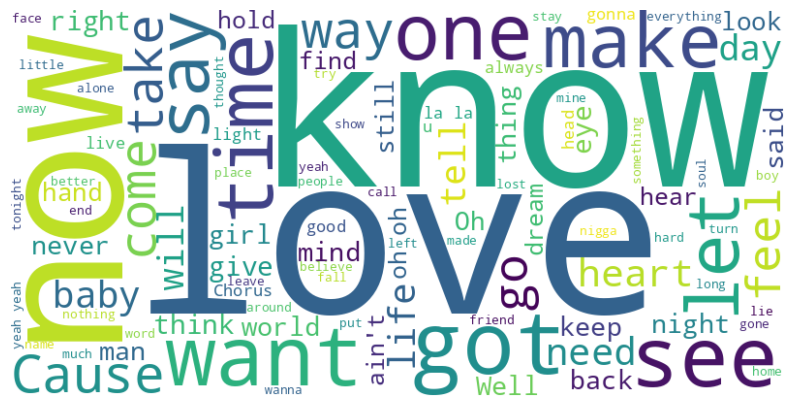

In [18]:
text = ' '.join(data['seq'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### This is a wordcloud represting the most common words throughout all the lyrics. The words that occur more frequently are bigger in the image.

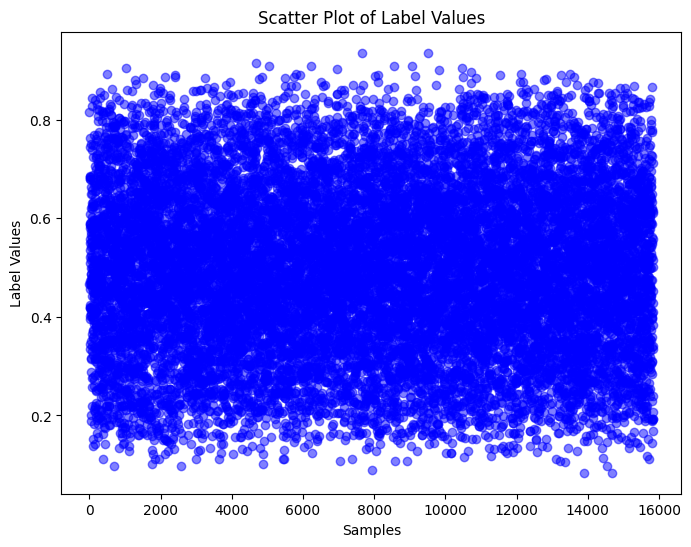

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data['label'])), data['label'], color='blue', alpha=0.5)
plt.xlabel('Samples')
plt.ylabel('Label Values')
plt.title('Scatter Plot of Label Values')
plt.show()

#### As the label distribution is well-distributed with no outliers, we do not need to further clean the data

### Implementing machine learning models on the given dataset to assign a positivity score.
#### Our goal is to predict a positivity score for any English song based on it's lyrics. To do this, we can use several machine learning models.
#### Models used: Linear Regression, Random Forest Regressor, Adaboost Regressor, Gradient Boosting Regressor and Support Vector Machine.

In [20]:
#Loading the lyrics and positivity scores of all the songs
lyrics = data['seq']
valence_scores = data['label']

# Vectorization using Tf-Idf
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(lyrics)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, valence_scores, test_size=0.2, random_state=42)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
predictions = np.clip(predictions, 0, 1)
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

Mean Squared Error: 0.1433421361953029
R2 score: -10.034348860616225


#### Discussion on Linear Regression:
#### 1. Since it works with numerical data as features, we have to convert the lyrics into a numerical vector.
#### 2. To do this, we use TF-IDF (Term Frequency-Inverse Document Frequency).
#### 3. We also need to remove all the 'stopwords' from the lyrics before converting them into a numerical vector. Stop words are words like 'he','the', 'himself' etc. which do not contribute to the meaning of the lyrics.
#### 4. This is done internally by passing a stop_words parameter to the TfidfVectorizer function.
#### 5. We use a random_state of 42 so we can reproduce results later if needed.
#### 6. The test size used here is 20%.

#### Observations and Performance:
#### 1. The model gives an output that is not within the required range of 0 to 1. This is why we use np.clip() to normalize the output and bring it to the required range.
#### 2. We get an R2 score of -10 and a mean squared error of 0.14.
#### 3. While 0.14 is not a bad mean squared error, a negative R2 score implies that the data does not follow a linear trend.


In [21]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['seq'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Model Selection and Training (Random Forest Regressor)
rf_model = RandomForestRegressor(random_state=42,n_estimators=100,n_jobs=-1,criterion="poisson")
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)
predictions = np.clip(predictions, 0, 1)

# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

Mean Squared Error: 0.0011422203543987519
R2 score: 0.9120729033299734


#### Discussion on Random Forest Regressor:
#### 1. Since it works with numerical data as features, we have to convert the lyrics into a numerical vector.
#### 2. To do this, we use TF-IDF (Term Frequency-Inverse Document Frequency).
#### 3. We also need to remove all the 'stopwords' from the lyrics before converting them into a numerical vector. Stop words are words like 'he','the', 'himself' etc. which do not contribute to the meaning of the lyrics.
#### 4. This is done internally by passing a stop_words parameter to the TfidfVectorizer function.
#### 5. We use a random_state of 42 so we can reproduce results later if needed.
#### 6. We set the n_estimators parameter as 100 which means that we will be building 100 trees. This is the number that gives the best performance within a reasonable amount of time.
#### 7. We set the n_jobs parameter as -1 which means that we have all cores of the CPU running various steps of the model in parallel.
#### 8. The criterion is 'poisson' in this case. This criterion is based on the Poisson deviance. It is a way of calculating impurity and helps decide when to split the node.

#### Observations and Performance:
#### 1. The model gives an output that is not within the required range of 0 to 1. This is why we use np.clip() to normalize the output and bring it to the required range.
#### 2. We get an R2 score of 0.9122 and a mean squared error of 0.0011.
#### 3. Both of these are good scores and means that the random forest with poisson deviance as the impurity function works well with our data.


In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['seq'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)
base_estimator = DecisionTreeRegressor(max_depth=20)
# Applying AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator,random_state=42,n_estimators=50,learning_rate=0.5, loss='linear')
adaboost_regressor.fit(X_train, y_train)

# Predictions
predictions = adaboost_regressor.predict(X_test)
predictions = np.clip(predictions, 0, 1)
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

Mean Squared Error: 0.00409906373805417
R2 score: 0.6844577561899524


#### Discussion on AdaBoost Regressor:
#### 1. Since it works with numerical data as features, we have to convert the lyrics into a numerical vector.
#### 2. To do this, we use TF-IDF (Term Frequency-Inverse Document Frequency).
#### 3. We also need to remove all the 'stopwords' from the lyrics before converting them into a numerical vector. Stop words are words like 'he','the', 'himself' etc. which do not contribute to the meaning of the lyrics.
#### 4. We use a random_state of 42 so we can reproduce results later if needed.
#### 5. Adaboost uses a number of weak regressors and combines them to give out a stronger result.
#### 6. The base regressor used here is a Decision Tree of maximum depth 20. As our data is a complex vector, we have to use stronger base regressors.
#### 7. We set the n_estimators parameter as 50 which means that we will be building 50 decision trees.
#### 8. We use the linear loss function as it performs the best with our data.
#### 9. The optimal learning rate is around 0.5.

#### Observations and Performance:
#### 1. The model gives an output that is not within the required range of 0 to 1. This is why we use np.clip() to normalize the output and bring it to the required range.
#### 2. We get an R2 score of 0.7082 and a mean squared error of 0.0037.
#### 3. Both of these are reasonable scores and mean that the adaboost works somewhat well with our data but not quite as well as random forest regressor.

In [23]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['seq'])
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Applying Gradient Boosting Regressor
gradient_boost_regressor = GradientBoostingRegressor(random_state=42,max_depth=20,criterion='friedman_mse',learning_rate=0.1)
gradient_boost_regressor.fit(X_train, y_train)

# Predictions
predictions = gradient_boost_regressor.predict(X_test)
predictions = np.clip(predictions, 0, 1)
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

Mean Squared Error: 0.0028814519366067845
R2 score: 0.7781884187194124


#### Discussion on Gradient Boosting Regressor:
#### 1. Since it works with numerical data as features, we have to convert the lyrics into a numerical vector.
#### 2. To do this, we use TF-IDF (Term Frequency-Inverse Document Frequency).
#### 3. We also need to remove all the 'stopwords' from the lyrics before converting them into a numerical vector. Stop words are words like 'he','the', 'himself' etc. which do not contribute to the meaning of the lyrics.
#### 4. We use a random_state of 42 so we can reproduce results later if needed.
#### 5. Gradient Boost starts with an initial prediction (usually the average) and then decision trees are fit on the residuals. Finally, the weak learners are cobined and the predictions are regularized.
#### 6. We set the maximum depth of the decision trees as 20.
#### 7. We use the Friedman Mean Square error as it performs best with our data.
#### 8. The optimal learning rate is around 0.1.

#### Observations and Performance:
#### 1. The model gives an output that is not within the required range of 0 to 1. This is why we use np.clip() to normalize the output and bring it to the required range.
#### 2. We get an R2 score of 0.7364 and a mean squared error of 0.0034.
#### 3. Both of these are reasonable scores and mean that the Gradient boost works similar to Adaboost with our data.

In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['seq'])
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Applying Support Vector Regressor (SVR)
svm_regressor = SVR(kernel='rbf',C=1.0, epsilon=0.05)
svm_regressor.fit(X_train, y_train)

# Predictions
predictions = svm_regressor.predict(X_test)
predictions = np.clip(predictions, 0, 1)
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, predictions)
print(f"R2 score: {r2}")

Mean Squared Error: 0.00503201164918911
R2 score: 0.6126402641845317


#### Discussion on Support Vector Machine:
#### 1. Since it works with numerical data as features, we have to convert the lyrics into a numerical vector.
#### 2. To do this, we use TF-IDF (Term Frequency-Inverse Document Frequency).
#### 3. We also need to remove all the 'stopwords' from the lyrics before converting them into a numerical vector. Stop words are words like 'he','the', 'himself' etc. which do not contribute to the meaning of the lyrics.
#### 4. We use a random_state of 42 so we can reproduce results later if needed.
#### 5. SVM maps the existing data onto a higher dimensional space using a kernel function where linear relationships between features and labels.
#### 6. We set the value of epsilon as 0.05 and C as 1.
#### 7. We use the rbf kernel.

#### Observations and Performance:
#### 1. The model gives an output that is not within the required range of 0 to 1. This is why we use np.clip() to normalize the output and bring it to the required range.
#### 2. We get an R2 score of 0.61 and a mean squared error of 0.0050.
#### 3. SVM does not perform very well on our data.

## Results (F2 Score, Mean Squared Error):
### Linear Regression: -10, 0.14
### Random Forest Regressor: 0.91, 0.0011
### Adaboost: 0.7082, 0.0037
### Gradient Boosting: 0.74, 0.0034
### Support Vector machine: 0.61, 0.0050

## Conclusions:


*   Random Forest Performs the best on our data.
*   In general, ensemble methods perform better on this dataset as compared to linear regression and support vectors.

